In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import sklearn

In [11]:
from sklearn import datasets
data = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

In [12]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [13]:
# afficher les noms des différentes variables explicatives
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [14]:
# mettre ces données de ce dictionnaire dans un DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
df["Price"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

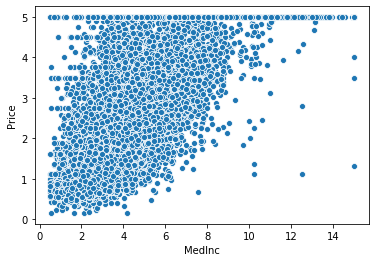

In [16]:
# Faites un nuage de points pour exprimer MedInc en fonction de Price
sns.scatterplot(y = "Price", x = "MedInc", data=df)

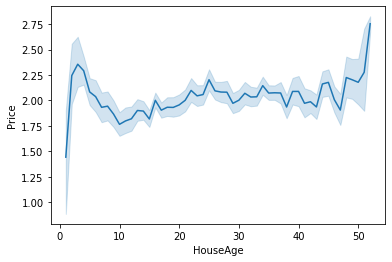

In [17]:
# Regardez maintenant l'influence de l'âge de la maison par rapport au prix
sns.lineplot(x = "HouseAge", y = "Price", data = df)

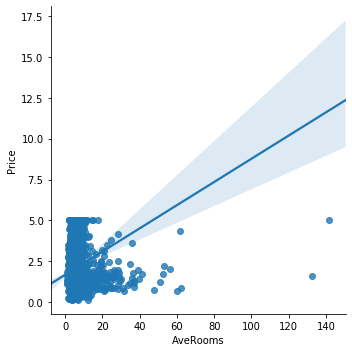

In [18]:
# Trouvez un moyen de regarder la tendance entre AveRooms & Price
sns.lmplot(x = "AveRooms", y = "Price", data =df)

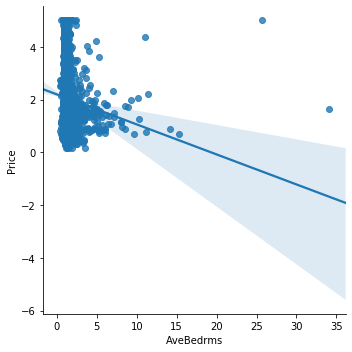

In [19]:
# Faites de même avec AveBedrms & Price
sns.lmplot(x = "AveBedrms", y = "Price", data =df)

In [20]:
'''Faites de même avec la population. Simplement, filtrez le dataset pour qu'il ne contienne
uniquement les valeurs pour lesquelles la population est inférieur à 15000'''
#df_pop = df.apply(lambda x : )
# df.columns
#Population = Population.astype(float64)
#df_pop = df.Population.apply(lambda x : "Population" if x <= 15000 else 0)
# df_pop = df[df["Population"] <= 15000]
# sns.lmplot(y = "Price", x = "Population", data = df,)
mask = df.Population <= 15000
df["Population"][mask]

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: Population, Length: 20634, dtype: float64

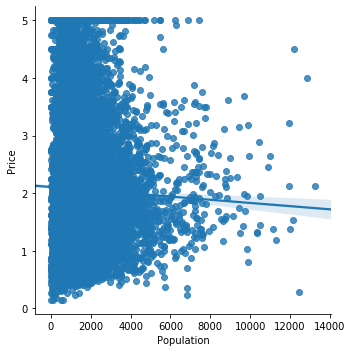

In [21]:
'''Faites de même avec la population. Simplement, filtrez le dataset pour qu'il ne contienne
uniquement les valeurs pour lesquelles la population est inférieur à 15000'''
# dt_pop = df[df.Population < 15000] => supprimer les lignes dont les valeurs sont > 15000
df_pop = df.where(df["Population"] < 15000) # supprimer les lignes dont les valeurs sont > 15000
sns.lmplot(y = "Price", x = "Population", data = df_pop)

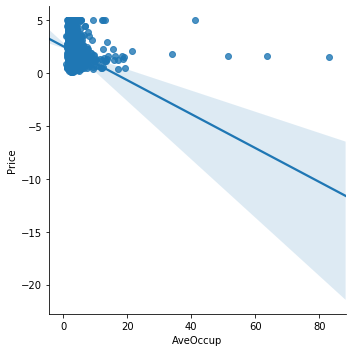

In [22]:
'''Faites de même avec AveOccup. Cette fois filtrez la colonne pour ne garder unqiuement 
les valeurs inférieures à 100'''
df_avo = df.where(df["AveOccup"] < 100)
sns.lmplot(x = "AveOccup", y = "Price", data = df_avo)

In [23]:
'''Coupez votre dataset en deux. Vous aurez X comprenant les variables explicatives 
et y contenant la variable cible'''
# Séparation des données en variables explicatives x et target y 
'''x = df.drop("Price", axis = 1) d'où "axis=1" renseigne que c'est une colonne qui doit être supprimée. 
Par défaut, axis=0 pr le lignes'''  
X = df.iloc[:, 0:-1]# afficher toutes les colonnes sauf la dernière 
# y = dataset.iloc[:,-1]
Y = df.iloc[:,-1] # afficher uniquement la dernière colonne
col = X.columns

In [24]:
'''Maintenant, séparez votre dataset en un train_set et un test_set. On utilisera 
scikitlearn pour cela'''
# Division du dataset en train_set et un test_set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
# 0.33 => 33 % de mon dataset sera dédié au test

In [25]:
# Normalisation des x
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [26]:
# Créez votre modèle de régression linéaire via scikit learn
# Création du modèle 
from sklearn.linear_model import LinearRegression
# LinearRegression permet de trouver les points de minimiser les points de regression trouvés
regressor = LinearRegression()
regressor.fit(X_train, Y_train) # Ne jamais faire un fit sur un test

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [28]:
'''Affichez votre score R2 via scikitlearn sur vos données de test. 
Commentez les résultats de votre score.'''
# Evaluation du modèle 
regressor.score(X_test, Y_test)

0.5970494128783952

In [29]:
# Vérifcation de l'overfitting 
print("Le Train_score est de : {}".format(regressor.score(X_train, Y_train)))

print("Le Test_score est de : {}".format(regressor.score(X_test, Y_test)))

Le Train_score est de : 0.609370412027382
Le Test_score est de : 0.5970494128783952


In [30]:
# Affichez les coefficients de chacune des variables explicatives
regressor.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [31]:
# Créez un DataFrame dans lequel vous aurez les colonnes qui se rapportent au bon coefficient
feature_importance = pd.DataFrame({"Features": col, "coefficients":regressor.coef_})
feature_importance.sort_values(["coefficients"], ascending=False)

,Features,coefficients
3,AveBedrms,7.791447e-01
0,MedInc,4.448705e-01
1,HouseAge,9.550046e-03
4,Population,-7.689908e-08
5,AveOccup,-3.299485e-03
2,AveRooms,-1.219915e-01
6,Latitude,-4.191312e-01
7,Longitude,-4.341035e-01


In [32]:
'''En général, on évite de regarder les coefficients pour déterminer l'importance des features. 
On va plutôt utiliser quelque chose que f_regression'''
from sklearn.feature_selection import f_regression # importer la librairie f_regression
feature_importance = f_regression(X_train, Y_train)
feature_importance

(array([1.24517271e+04, 1.56456050e+02, 3.26866011e+02, 3.30761608e+01,
        8.23376543e+00, 5.89093955e+00, 2.76044533e+02, 3.52590701e+01]),
 array([0.00000000e+00, 1.05011198e-35, 3.13665831e-72, 9.04930334e-09,
        4.11804465e-03, 1.52316672e-02, 2.14987140e-61, 2.95557077e-09]))

In [33]:
# Mettez ensuite vos résultats dans un dataframe pour qu'on puisse les interpréter
feature_ranking = pd.DataFrame({"Features":df.columns[:-1], 'f-score':feature_importance[0],
                                'p-value':feature_importance[1]})
feature_ranking.sort_values(["f-score"], ascending=False)

,Features,f-score,p-value
0,MedInc,12451.727123,0.000000e+00
2,AveRooms,326.866011,3.136658e-72
6,Latitude,276.044533,2.149871e-61
1,HouseAge,156.456050,1.050112e-35
7,Longitude,35.259070,2.955571e-09
3,AveBedrms,33.076161,9.049303e-09
4,Population,8.233765,4.118045e-03
5,AveOccup,5.890940,1.523167e-02


<function matplotlib.pyplot.show(*args, **kw)>

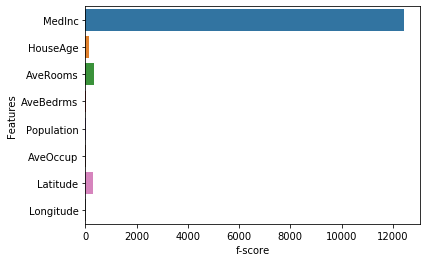

In [34]:
ax = sns.barplot(x = "f-score", y = "Features", data = feature_ranking)
# ax.set(xlabel = "f-score", ylabel = "Features")
plt.show

In [35]:
# Prenez un échantillon de votre dataset via .sample() On prendra 150 valeurs
df.sample(150).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
14983,3.8295,13.0,6.186047,1.004651,719.0,3.344186,32.72,-116.99,1.49600
6591,15.0001,34.0,8.114173,1.023622,825.0,3.248031,34.19,-118.19,5.00001
15911,3.3555,52.0,3.961538,1.111722,1447.0,2.650183,37.75,-122.42,2.75000
14056,2.5872,31.0,3.835796,1.077176,1186.0,1.947455,32.75,-117.13,1.30600
8905,3.3889,32.0,4.086486,1.059459,1323.0,1.787838,34.03,-118.47,3.47900


In [36]:
# Faites un reset des index pour avoir une suite de nombre comprise en 0 et la taille du dataset
df.reset_index(drop=True).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
import statsmodels.api as sm
X_ols = df.drop('Price', axis = 1)
X_ols["beta"] = 1
Y_ols = df['Price']
model = sm.OLS(Y_ols, X_ols)
results_traits = model.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:50:20   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
beta         -36.9419      0.659    -56.067      0.000     -38.233     -35.650
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
'''Utilisez l’aide suivante afin de traduire la longitude et la latitude des données pour trouver 
les villes correspondant à chaque observation : geopy'''
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Localisator_App")
location = geolocator.geocode(["52.520007, 13.404954"])
dict(location_raw).address

NameError: name 'location_raw' is not defined